In [5]:
import algotrader as at
gAccount = 'RF5D03'
gSym = 'EURUSD'
gDtFrom = None
gDtTo = None

In [6]:
from datetime import timezone
from datetime import datetime
from datetime import timedelta
import time

# global time vars
gTimezoneUTC = timezone.utc
gTdOffset= timedelta(hours=2)   # TODO recognise me - summer time 3h and winter time 2h
gTicksPerPeriod = 36#36000  #  10hours * 36000secs/hours -> 36000 ticks per period
gTimeDelta = timedelta( hours=4 )   # TODO config var 10 hours -> related to 36000 (gTicksPerPeriod) elements for ticks array
#gDtTo   = datetime.now(gTimezoneUTC) + gTdOffset
gDtTo   = datetime(2025, 1, 3, 17, 2, 50, 0, tzinfo=gTimezoneUTC)
gDtFrom = gDtTo - gTimeDelta
print( "\nFrom: ", gDtFrom, " To: ", gDtTo )
gDtTo_epoch_ms = int(gDtTo.timestamp()*1000)
print( "\ngDtTo.timestamp() ", gDtTo.timestamp(), " gDtTo_epoch_ms: ", gDtTo_epoch_ms)



From:  2025-01-03 13:02:50+00:00  To:  2025-01-03 17:02:50+00:00

gDtTo.timestamp()  1735923770.0  gDtTo_epoch_ms:  1735923770000


In [7]:
gH = at.Algotrader(gAccount)
gH.mt5_init()

True

In [8]:
#gDtTo   = datetime.now(gTimezoneUTC) + gTdOffset
#gDtTo   = datetime(2025, 1, 3, 17, 2, 50, 0, tzinfo=gTimezoneUTC)
#gDtTo   = None


In [9]:
# analyse a singe data frame
gH.get_date_range(gDtTo)
gH.get_ticks_and_rates( gSym )
gH.analyse_df( gSym )

,sec,vol,cnt,t1,t0,dt_to,c1,c0,DELTA,OC,HL,TD,VOLS,TT,HL/TD,HL/VOLS,SUMCOL
T1,0.0,1.0,10.0,1735923764271,1735923769869,1735923770000,1.029740,1.029750,0,0,2,5,10,500,0.4,0.2,0.6
T10,0.0,10.0,10.0,1735923735022,1735923764271,1735923770000,1.029550,1.029750,0,19,26,34,100,340,0.8,0.3,1.1
T100,0.0,100.0,10.0,1735923510255,1735923735022,1735923770000,1.030210,1.029750,0,-46,102,259,1000,259,0.4,0.1,0.5
T1000,0.0,1000.0,10.0,1735917895096,1735923510255,1735923770000,1.029780,1.029750,0,-2,143,5874,10000,587,0.0,0.0,0.0
S1,1.0,0.0,10.0,1735923760269,1735923769421,1735923770000,1.029660,1.029740,0,8,11,9,54,167,1.2,0.2,1.4
S10,10.0,0.0,10.0,1735923670478,1735923760269,1735923770000,1.029720,1.029740,0,2,67,99,348,284,0.7,0.2,0.9
S100,100.0,0.0,10.0,1735922771244,1735923670478,1735923770000,1.029700,1.029740,0,4,102,998,2167,461,0.1,0.0,0.1
S1000,1000.0,0.0,10.0,1735913770358,1735922771244,1735923770000,1.029700,1.029740,0,4,143,9999,14904,671,0.0,0.0,0.0
SUMROW,138.0,138.0,10.0,1735921609624,1735923593853,1735923770000,1.029758,1.029745,0,-1,74,2159,3572,408,0.4,0.1,0.5


In [10]:
gH.run_analyse( gDtTo, gSym )

,sec,vol,cnt,t1,t0,dt_to,c1,c0,DELTA,OC,HL,TD,VOLS,TT,HL/TD,HL/VOLS,SUMCOL
T1,0.0,1.0,10.0,1735923764271,1735923769869,1735923770000,1.029740,1.029750,0,0,2,5,10,500,0.4,0.2,0.6
T10,0.0,10.0,10.0,1735923735022,1735923764271,1735923770000,1.029550,1.029750,0,19,26,34,100,340,0.8,0.3,1.1
T100,0.0,100.0,10.0,1735923510255,1735923735022,1735923770000,1.030210,1.029750,0,-46,102,259,1000,259,0.4,0.1,0.5
T1000,0.0,1000.0,10.0,1735917895096,1735923510255,1735923770000,1.029780,1.029750,0,-2,143,5874,10000,587,0.0,0.0,0.0
S1,1.0,0.0,10.0,1735923760269,1735923769421,1735923770000,1.029660,1.029740,0,8,11,9,54,167,1.2,0.2,1.4
S10,10.0,0.0,10.0,1735923670478,1735923760269,1735923770000,1.029720,1.029740,0,2,67,99,348,284,0.7,0.2,0.9
S100,100.0,0.0,10.0,1735922771244,1735923670478,1735923770000,1.029700,1.029740,0,4,102,998,2167,461,0.1,0.0,0.1
S1000,1000.0,0.0,10.0,1735913770358,1735922771244,1735923770000,1.029700,1.029740,0,4,143,9999,14904,671,0.0,0.0,0.0
SUMROW,138.0,138.0,10.0,1735921609624,1735923593853,1735923770000,1.029758,1.029745,0,-1,74,2159,3572,408,0.4,0.1,0.5


In [11]:
# live  modus
#gH.set_gc0()

# analysis modus
gH.get_date_range(gDtTo)
gH.get_ticks_and_rates( gSym )
df = gH.get_df_rates( gDtTo, 'S10', gSym )
gH.g_c0[gSym] = df.iloc[0].close
#gH.set_gc0_price( gSym, df.iloc[0].close )
print(df.iloc[0].close)



1.02972


In [12]:
# same as above with different output
dfana = gH.run_analyse( gDtTo, 'EURUSD' )
gH.print_analyse_df( dfana )

        DELTA  OC   HL    TD   VOLS   TT  HL/TD  HL/VOLS  SUMCOL
T1          2   0    2     5     10  500    0.4      0.2     0.6
T10         2  19   26    34    100  340    0.8      0.3     1.1
T100        2 -46  102   259   1000  259    0.4      0.1     0.5
T1000       2  -2  143  5874  10000  587    0.0      0.0     0.0
S1          2   8   11     9     54  167    1.2      0.2     1.4
S10         2   2   67    99    348  284    0.7      0.2     0.9
S100        2   4  102   998   2167  461    0.1      0.0     0.1
S1000       2   4  143  9999  14904  671    0.0      0.0     0.0
SUMROW      2  -1   74  2159   3572  408    0.4      0.1     0.5


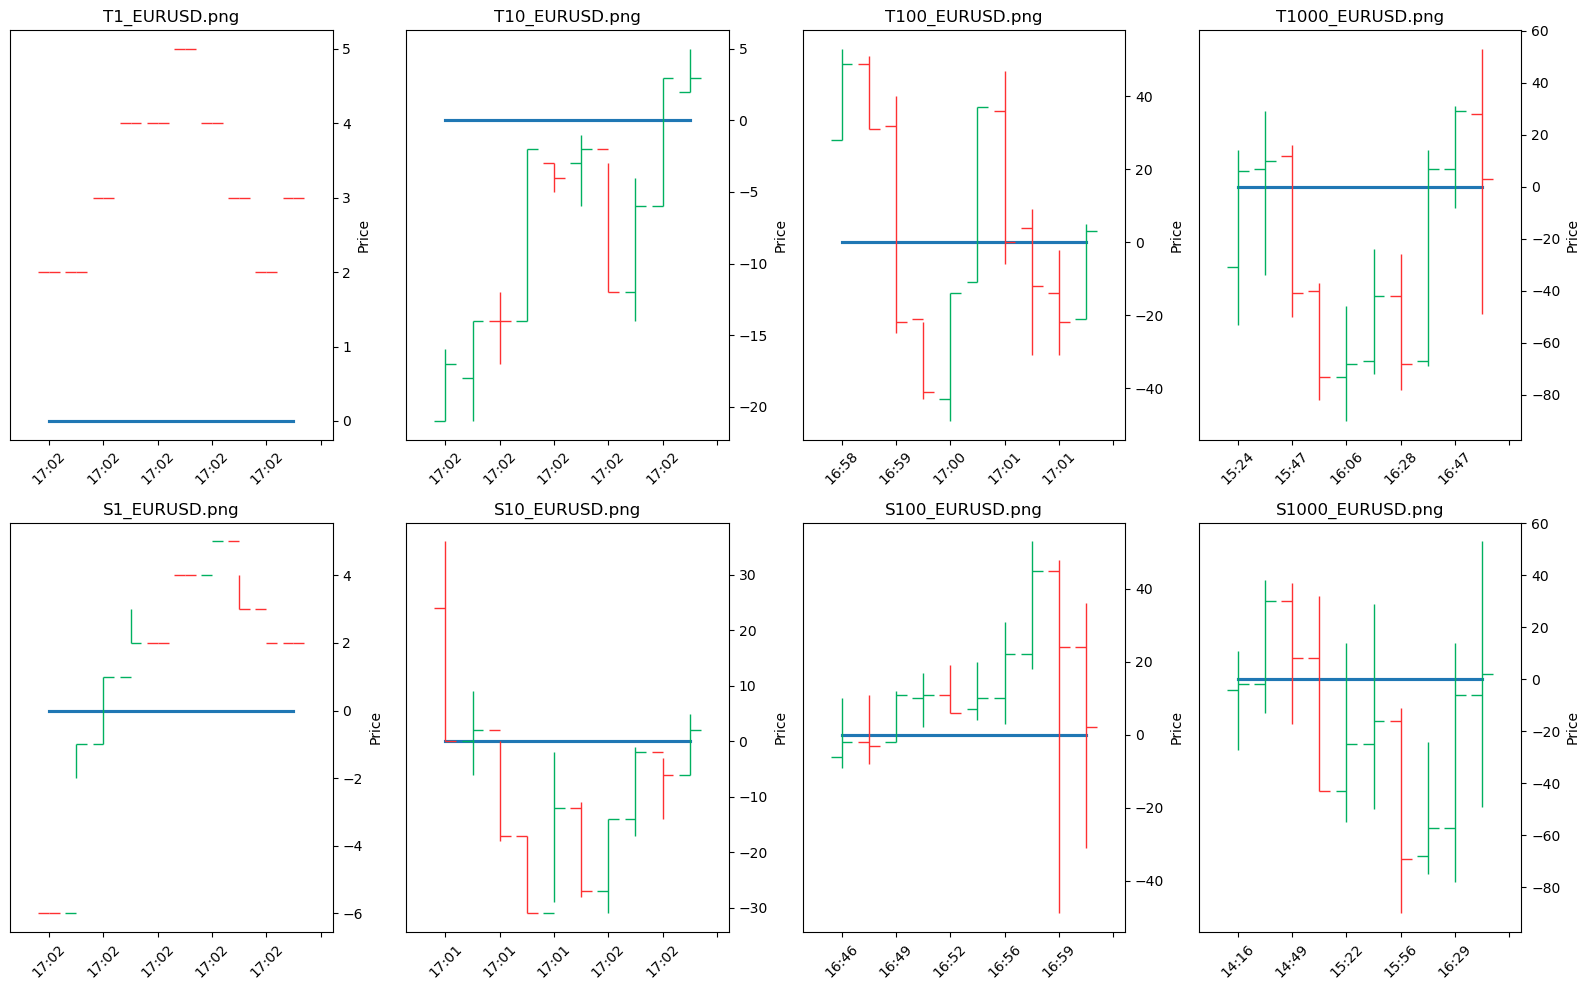

In [13]:
gH.print_fig_all_periods_per_sym()


EURUSD_20250103_170250_PER_T1


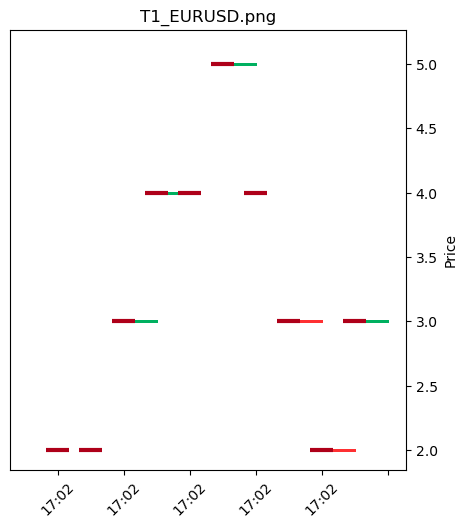

EURUSD_20250103_170250_PER_T10


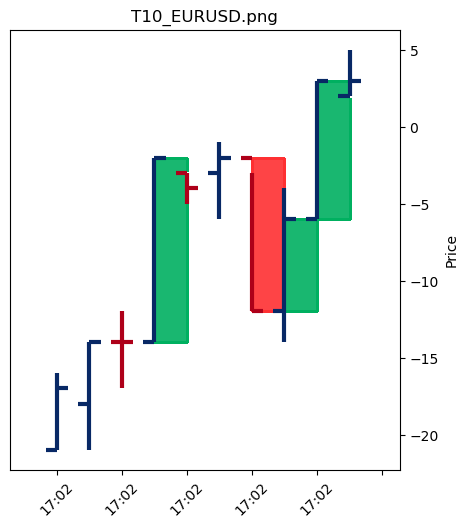

EURUSD_20250103_170250_PER_T100


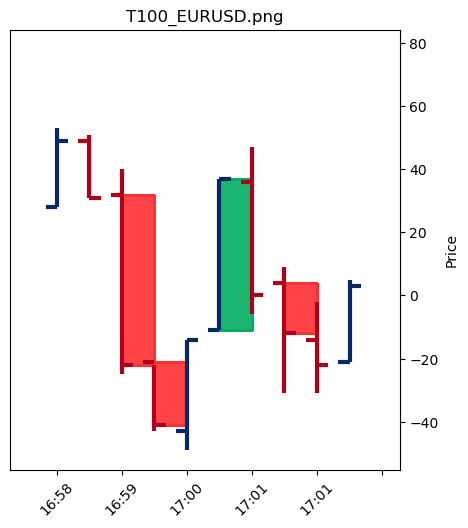

EURUSD_20250103_170250_PER_T1000


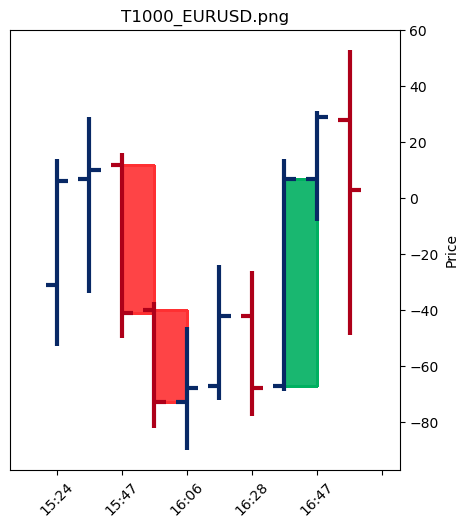

EURUSD_20250103_170250_PER_S1


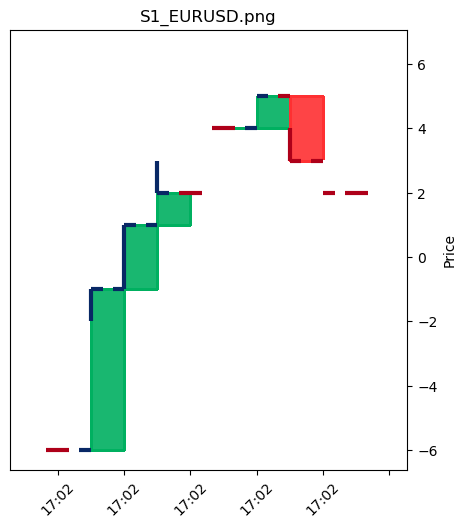

EURUSD_20250103_170250_PER_S10


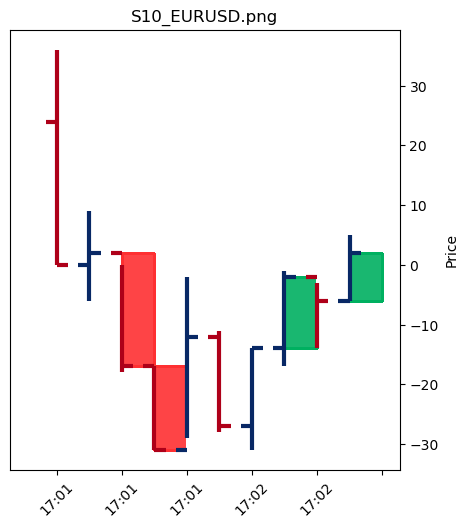

EURUSD_20250103_170250_PER_S100


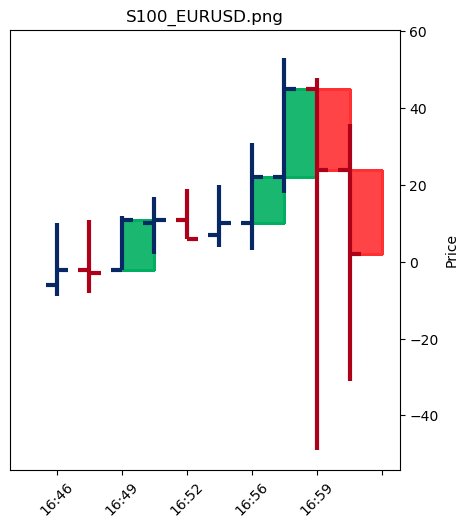

EURUSD_20250103_170250_PER_S1000


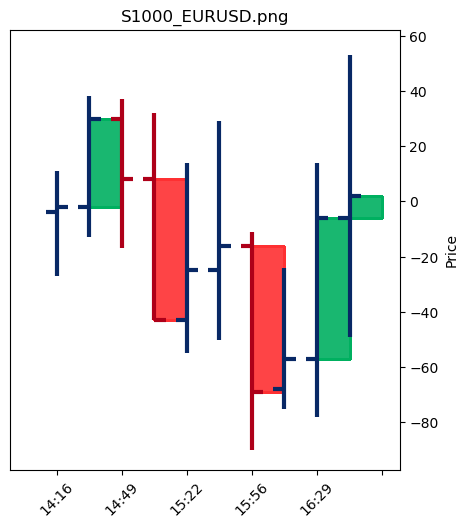

In [14]:
gH.print_fig_all_periods_and_all_syms()

EURUSD_20250103_170250_PER_T1_0


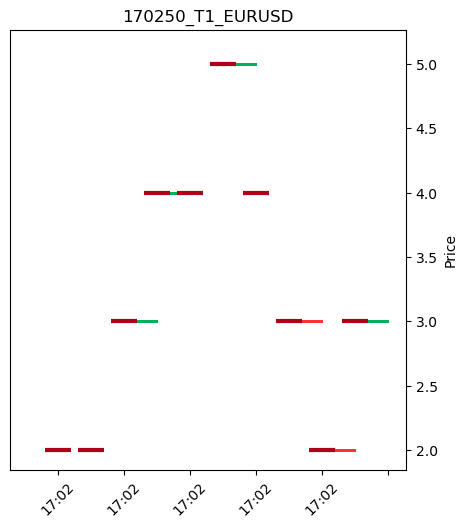

EURUSD_20250103_170250_PER_T10_0


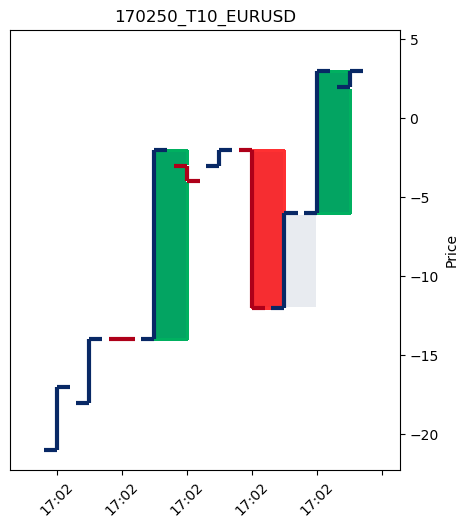

EURUSD_20250103_170250_PER_T100_0


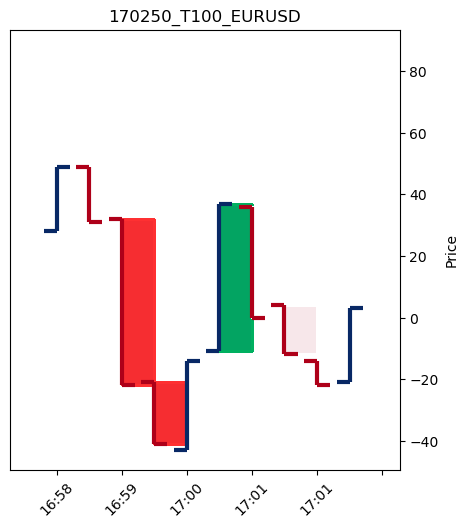

EURUSD_20250103_170250_PER_T1000_0


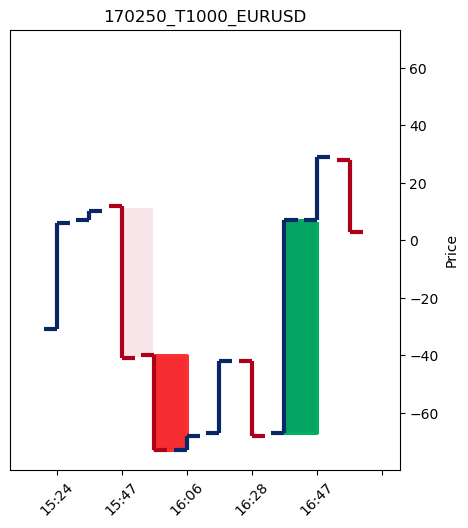

EURUSD_20250103_170250_PER_S1_0


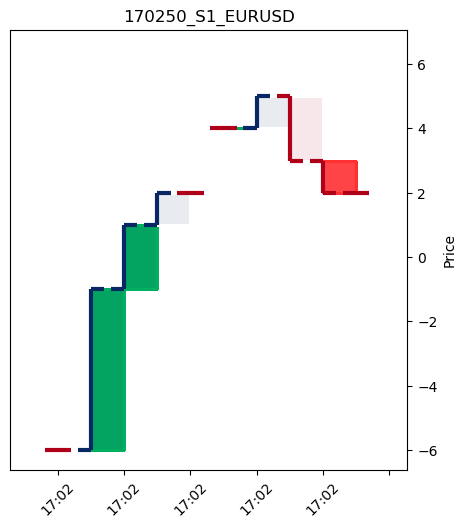

EURUSD_20250103_170250_PER_S10_0


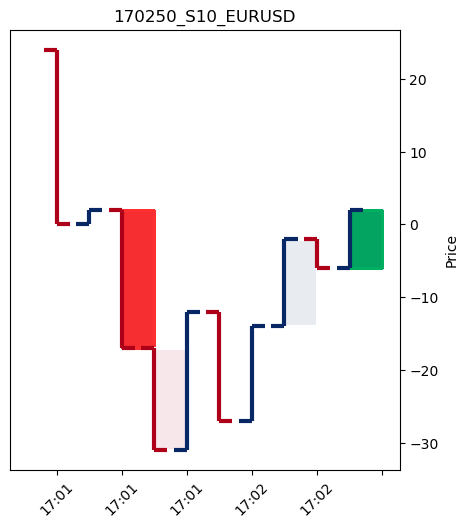

EURUSD_20250103_170250_PER_S100_0


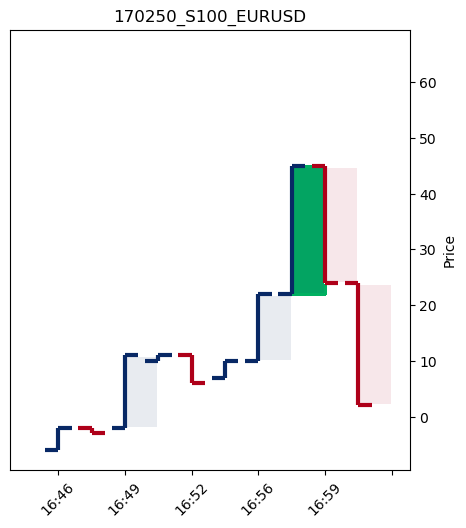

EURUSD_20250103_170250_PER_S1000_0


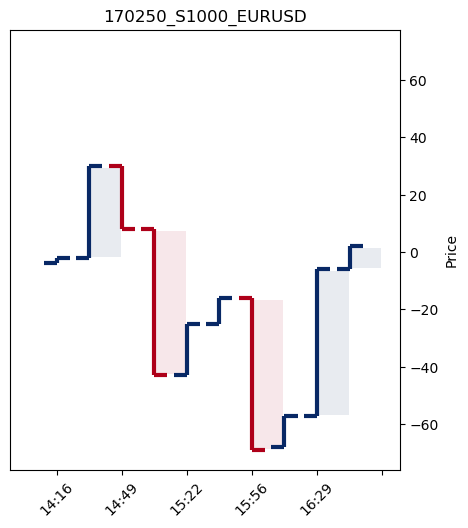

In [15]:

gH.print_past_entries_per_sym()

{'dt_count': 10, 'dt_volume': 1000, 'dt_seconds': 1000, 'dt_to': datetime.datetime(2025, 1, 7, 20, 25, 24, 643543, tzinfo=datetime.timezone.utc), 'dt_from': datetime.datetime(2025, 1, 7, 0, 5, tzinfo=datetime.timezone.utc)}
1.0364
        DELTA  OC   HL     TD   VOLS   TT  HL/TD  HL/VOLS  SUMCOL
T1        -39   0    1      5     10  500    0.2      0.1     0.3
T10       -39 -22   29     37    100  370    0.8      0.3     1.1
T100      -39 -41   87    557   1000  557    0.2      0.1     0.3
T1000     -39 -62  200   5034  10000  503    0.0      0.0     0.0
S1        -38  -4    8     10     64  156    0.8      0.1     0.9
S10       -38 -29   43     99    209  474    0.4      0.2     0.6
S100      -38  -4  120   1000   1807  553    0.1      0.1     0.2
S1000     -38 -53  307  10000  25774  388    0.0      0.0     0.0
SUMROW    -38 -26   99   2092   4870  437    0.3      0.1     0.4


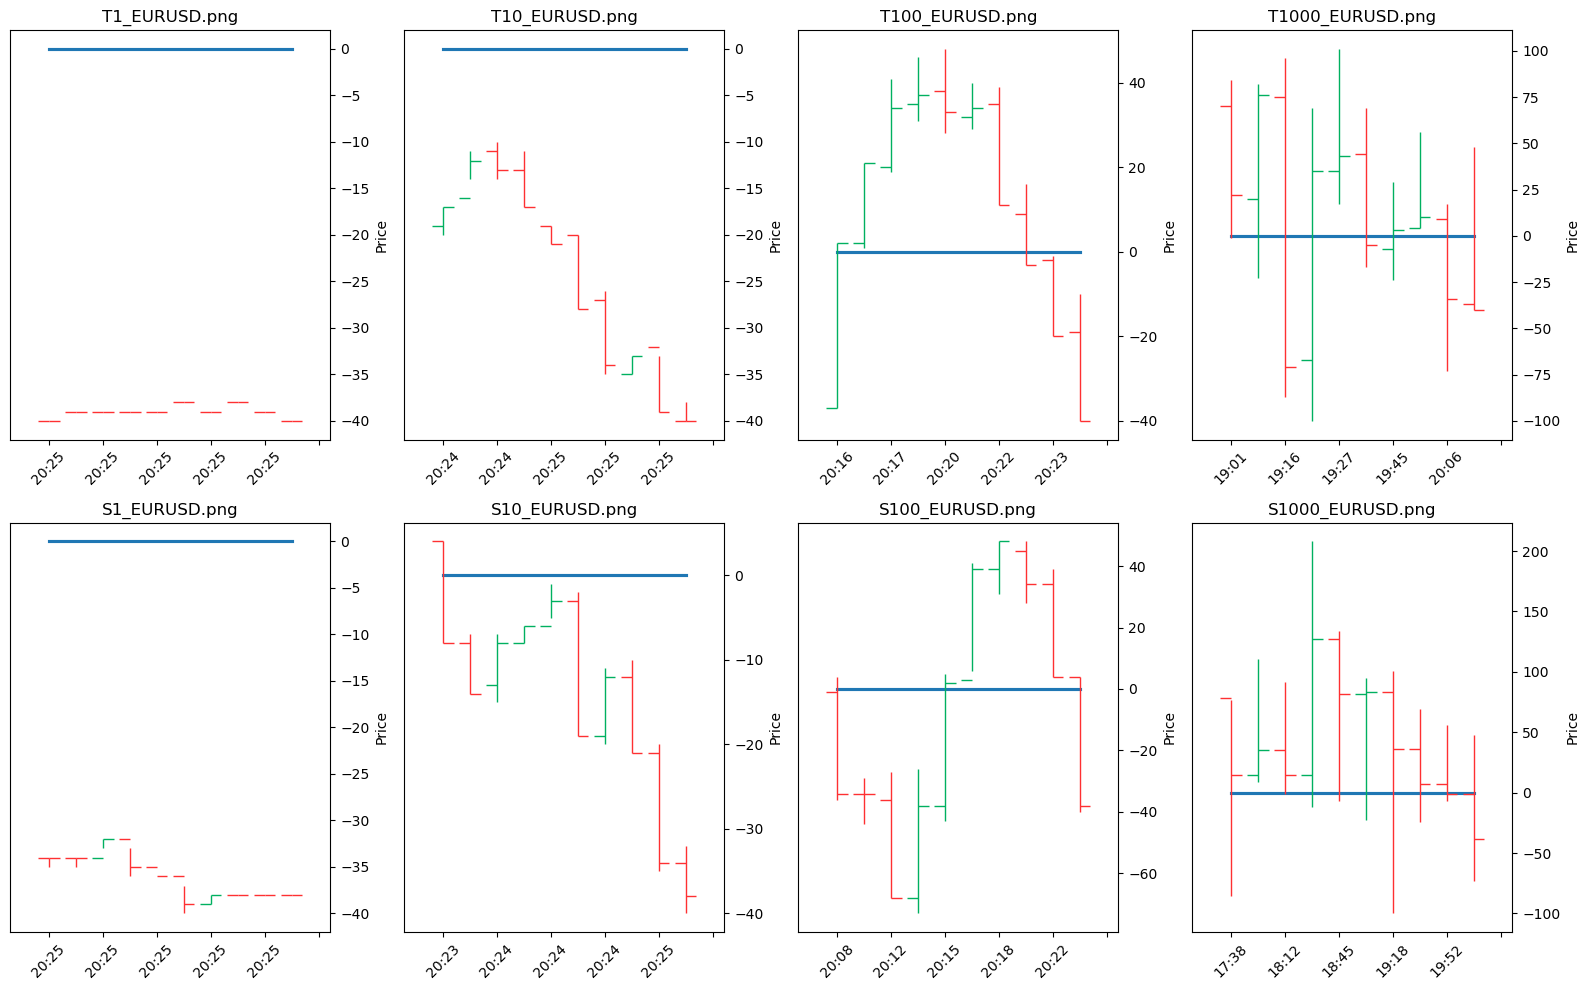

In [33]:
gDtTo   = datetime(2025, 1, 6, 17, 2, 50, 0, tzinfo=gTimezoneUTC)
gDtTo   = datetime.now(gTimezoneUTC) + gTdOffset
gH.get_date_range(gDtTo)
print(gH.gDt)
# TODO write function which returns c0 of the day for open and close
gDtFrom = gDtTo.replace(hour=0, minute=5, second=0, microsecond=0)
# TODO check that g_c0 is set, at least for the start of the day price
gH.g_c0[gSym] = 1.036400
print(gH.g_c0[gSym])
# TODO check for T3600 that at least 3600*10 ticks do exists at the current moment of query
gH.run_now( None, gSym )

In [31]:
gH.cf_periods['RF5D03']['T100']


{'type': 'dynamic', 'seconds': 0, 'minutes': 0, 'volume': 100}

In [32]:
gH.cf_periods['RF5D03']['T100']['volume']= 100

In [19]:
gH.cf_periods['RF5D03']['S100']['seconds']= 100